# INSY 6500 Fall 2019 Midterm Exam - Python Component
## Name: Jeff Smith

Make sure and replace my name with yours before you submit.  You are also free to add aditional code and/or markdown cells as necessary.  When I request a "user-friendly format", I mean to print the answer in a sentence and use a standard format for numbers/dates, etc.

In [6]:
# Setting things up - Any imports or directives should go here.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import datetime


### [1] Read the data file "aokang_store.csv" into a Pandas dataframe and display the first 10 rows.  Make sure that the creation dates are read as timestamps rather than strings.

In [8]:
df = pd.read_csv("aokang_store.csv", parse_dates = ["CreationDTG"])
df.head(10)

,OrderNum,SKU,Qty,CreationDTG,Warehouse,BoxCode
0,TF1810250007979,18293101937,2,2018-10-26 08:17:00,SH01,0000247721
1,TF1810250007979,18293101936,1,2018-10-26 08:17:00,SH01,0000247721
2,TF1810250007979,18293101935,1,2018-10-26 08:17:00,SH01,0000247721
3,TF1810250007979,18293101938,2,2018-10-26 08:17:00,SH01,0000247721
4,TF1810250007979,18293101939,1,2018-10-26 08:17:00,SH01,0000247721
5,TF1810250007979,18121116139,1,2018-10-26 08:17:00,SH01,0000247721
6,TF1810250007991,18291109935,1,2018-10-25 17:01:00,SH01,BX1807120006542
7,TF1810250007991,18291109936,2,2018-10-25 17:01:00,SH01,BX1807120006542
8,TF1810250007991,18291109937,2,2018-10-25 17:01:00,SH01,BX1807120006542
9,TF1810250007991,18291109938,2,2018-10-25 17:01:00,SH01,BX1807120006542


The dataset includes order information from an online shoe company.  Each record includes an order number, a SKU, the number of units of the SKU included in the order, the creation date/time, the warehouse that that SKU was picked from, and the bar code for the box that contains the SKU.

### [2]  Compute the number of <i>unique</i> SKUs and <i>unique</i> orders are contained in the original dataset.  Display the answers in a user-friendly format.

In [17]:
print('There are {} unique SKUs in a total of {} orders.'.format(df['SKU'].nunique(), df['OrderNum'].count()))
print('and there are {} unique orders in a total of {} orders.'.format(df['OrderNum'].nunique(), df['OrderNum'].count()))

There are 2428 unique SKUs in a total of 12546 orders.
and there are 226 unique orders in a total of 12546 orders.


### [3] Create a new Pandas Dataframe that aggregates the records by SKU number (i.e., there should be one row for each unique SKU).  The columns should include the number of orders including that SKU, and the sum, mean, and maximum quantities of the SKU in the orders.  Display the first 5 rows of this new Dataframe.

In [29]:
df_new = df.groupby(['SKU']).aggregate(['count','sum', 'mean', 'max'])
df_new.columns = ['Number of Orders', 'Total Orders of SKU', 'Average Order', 'Maximum Order at Once']
df_new.head(10)

,Number of Orders,Total Orders of SKU,Average Order,Maximum Order at Once
SKU,,,,
5201100337,5,13,2.600000,4
5201100339,3,5,1.666667,2
5201103238,4,12,3.000000,4
5201103338,2,2,1.000000,1
5201103339,4,4,1.000000,1
5201103340,10,18,1.800000,4
5201103840,2,5,2.500000,3
5201200534,1,1,1.000000,1
5201200535,4,4,1.000000,1


### [4] Using the file aokang_store_aggregated.csv (which is a csv file that I created using the same aggregation that I asked for in the previous problem), create a matplotlib figure that includes two side-by-side histograms where the left plot aggregates on the sum column and the right aggregates on the count column.  Make sure that your plots have appropriate labels/titles.

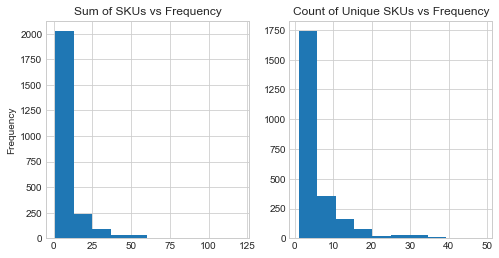

In [47]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set(ylabel='Frequency',title='Sum of SKUs vs Frequency')
ax2.set(title='Count of Unique SKUs vs Frequency')

ax1.hist(df_new['Total Orders of SKU'])
ax2.hist(df_new['Number of Orders']);


### [5] Using the CreationDTG column, find the earliest and latest times (including date) that orders were placed.  Display these dates in a user-friendly format.

In [82]:
print('The earliest order is in {:%b %d, %Y at %H:%M} and the latest one is {:%b %d, %Y at %H:%M}'.format(df['CreationDTG'].min(),df['CreationDTG'].max()))

The earliest order is in Oct 25, 2018 at 17:01 and the latest one is Oct 31, 2018 at 10:07
